Generowanie wykresów

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# desc = "main_snowball"
# files = [
#     "../stat_results/snowball/per100/cliques_50_snowball_stats.csv",
#     "../stat_results/snowball/cliques_80_snowball_stats.csv",
#     "../stat_results/snowball/cliques_100_snowball_stats_corr.csv",

#     "../stat_results/snowball/uniform_50_snowball_stats.csv",
#     "../stat_results/snowball/uniform_80_snowball_stats.csv",
#     "../stat_results/snowball/uniform_100_snowball_stats.csv",

#     "../stat_results/snowball/grid_50_snowball_stats.csv",
#     "../stat_results/snowball/grid_80_snowball_stats.csv",
#     "../stat_results/snowball/grid_100_snowball_stats.csv",

#     "../stat_results/snowball/conv_att48_snowball_stats.csv",
#     "../stat_results/snowball/conv_berlin52_snowball_stats.csv",
#     "../stat_results/snowball/conv_pr76_snowball_stats.csv",
#     "../stat_results/snowball/conv_eil76_snowball_stats.csv",
#     "../stat_results/snowball/conv_rat99_snowball_stats.csv",
#     "../stat_results/snowball/conv_bier127_snowball_stats.csv",

# ]

# desc = "per1_twophase"
# files = [
#     # "../stat_results/twophase/per1/cliques_7_twophase_stats.csv",
#     # "../stat_results/twophase/per1/cliques_8_twophase_stats.csv",
#     # "../stat_results/twophase/per1/cliques_9_twophase_stats.csv",
#     # "../stat_results/twophase/per1/cliques_10_twophase_stats.csv",
#     # "../stat_results/twophase/per1/cliques_11_twophase_stats.csv",
#     # "../stat_results/twophase/per1/grid_7_twophase_stats.csv",
#     # "../stat_results/twophase/per1/grid_8_twophase_stats.csv",
#     # "../stat_results/twophase/per1/grid_9_twophase_stats.csv",
#     # "../stat_results/twophase/per1/grid_10_twophase_stats.csv",
#     # "../stat_results/twophase/per1/grid_11_twophase_stats.csv",
#     # "../stat_results/twophase/per1/uniform_7_twophase_stats.csv",
#     # "../stat_results/twophase/per1/uniform_8_twophase_stats.csv",
#     # "../stat_results/twophase/per1/uniform_9_twophase_stats.csv",
#     # "../stat_results/twophase/per1/uniform_10_twophase_stats.csv",
#     # "../stat_results/twophase/per1/uniform_11_twophase_stats.csv",
#     "../stat_results/twophase/per1/conv_burma14_twophase_stats.csv",
#     "../stat_results/twophase/per1/conv_ulysses22_twophase_stats.csv",
# ]

desc = "per1_all"
files = [
    "../stat_results/twophase/per1/cliques_20_twophase_stats.csv",
    "../stat_results/twophase/per1/uniform_20_twophase_stats.csv",
    "../stat_results/twophase/per1/grid_20_twophase_stats.csv",
    "../stat_results/snowball/per1/cliques_20_snowball_stats.csv",
    "../stat_results/snowball/per1/uniform_20_snowball_stats.csv",
    "../stat_results/snowball/per1/grid_20_snowball_stats.csv",
    "../stat_results/twophase/per1/conv_burma14_twophase_stats.csv",
    "../stat_results/twophase/per1/conv_ulysses22_twophase_stats.csv",
    "../stat_results/snowball/per1/conv_burma14_snowball_stats.csv",
    "../stat_results/snowball/per1/conv_ulysses22_snowball_stats.csv",
]

# files = [
#     "../stat_results/snowball/per100/cliques_20_snowball_stats.csv",
#     "../stat_results/snowball/per100/uniform_20_snowball_stats.csv",
#     "../stat_results/snowball/per100/conv_ulysses22_snowball_stats.csv",
# ]

# files = [
#     "../stat_results/twophase/per100/cliques_20_twophase_stats.csv",
#     "../stat_results/twophase/per100/uniform_20_twophase_stats.csv",
#     "../stat_results/twophase/per100/conv_ulysses22_twophase_stats.csv",
#     "../stat_results/twophase/per100/conv_burma14_twophase_stats.csv",
# ]

dfs = {}

for path in files:
    dfs[path] = pd.read_csv(path, sep=';', index_col=0)


In [ ]:
from math import ceil
import math
from pathlib import Path

OUT_DIR = "merged_plots"

columns = list(dfs[files[0]].columns.values)
# columns.remove("cliques_num")
# columns.remove("maximal_cliques_num")

for column in columns[4:]:
    if column == "node_count":
        continue

    rows = ceil(len(dfs) / 3)
    fig = plt.figure(figsize = (20, 30))
    # fig = plt.figure(figsize = (15, 5))

    for i, key in enumerate(dfs):
        df = dfs[key]
        x = df["node_count"]
        y = df[column]

        #If we have multiple values for the same node count (possible for twophase), delete all values for n=max_node_count except last
        max_node_val = x.iloc[len(x)-1]
        pos = x.eq(max_node_val).idxmax()
        # x = x[0:pos+1]
        # y = y[0:pos+1]
        x = x[0:pos] + x[len(x)-1]
        y = y[0:pos] + y[len(y)-1]
        #

        y=y.fillna(0)
        plt.subplot(rows, 3, i+1)
        plt.ylabel(column)
        plt.xlabel("node_count")
        # plt.xlim(0, 100000)
        plt.title(key.split("/")[-1])
        plt.plot(x,y)

    print(column)
    path = OUT_DIR + "/" + desc + "/"
    p = Path(path)
    p.mkdir(exist_ok=True, parents=True)

    # plt.show()
    plt.savefig(path + column + ".png", bbox_inches='tight')
    # plt.clear()

UWAGA: WYpełnianie NAN zerem avg_go_path len

Porównanie długości próbkowania do wartości błędu

In [ ]:
import pandas as pd

instances = [
    "uniform_7",
    "uniform_8",
    "uniform_9",
    "uniform_10",
    "uniform_11",
    "cliques_7",
    "cliques_8",
    "cliques_9",
    "cliques_10",
    "cliques_11",
    "grid_7",
    "grid_8",
    "grid_9",
    "grid_10",
    "grid_11",
]

dfs = {}

algs = ["twophase", "snowball"]
snow_params = [1, 10, 100, 1000] 
tp_params = [10, 100, 1000, 10000]

#read data
for ins in instances:
    for param in snow_params:
        path = f"../stat_results/time_comp/{ins}_snowball_{param}.csv"
        df = pd.read_csv(path, delimiter=";")
        dfs[f"{ins}_snowball_{param}"] = df

    for param in tp_params:
        path = f"../stat_results/time_comp/{ins}_twophase_{param}.csv"
        df = pd.read_csv(path, delimiter=";")
        dfs[f"{ins}_twophase_{param}"] = df

    path = f"../stat_results/exhaustive/{ins}_exhaustive_stats.csv"
    df = pd.read_csv(path, delimiter=";")
    dfs[f"{ins}_exhaustive"] = df
        

In [ ]:
from IPython.display import display_markdown
import re


def write_cell(res_df, row_val, value, real):
    if (column in exclude_diff):
        res_df.loc[row_val, column] = f"{value:.2f}"
    else:
        diff = abs(value - real) / real * 100
        formatted = f"{value:.2f} ({diff:.2f}\%)"
        if diff != 0:
            formatted = "\\textbf{" + formatted + "}"
        res_df.loc[row_val, column] = formatted
    return res_df


lt_scale = 0.8


def gen_latex_table(df, col_num, instance_name, alg):
    s = df.style.to_latex(position_float="centering")
    s = s.replace("_", "\\_").replace("\\\\", "\\\\ \\hline")
    lines = s.splitlines()
    #font size
    lines.insert(2, "\\footnotesize")
    #cap
    instance = instance_name.replace("_", "\\_")
    caption = f"Instancja {instance} - porównanie wartości miar uzyskanych z próbkowania {alg} z wartościami z przeglądu zupełnego.".replace(
        "twophase", "dwufazowego")
    label = f"tab:comp_{instance_name}_{alg}"
    lines.insert(2, "\\label{" + label + "}")
    lines.insert(2, "\\caption{" + caption + "}")
    #scalebox
    lines.insert(5, "\\resizebox{\\textwidth}{!}{")
    lines.insert(-1, "}")
    #top line
    lines.insert(7, "\\hline")
    #vertical lines
    vert = "\\begin{tabular}{"
    vert += "|l" * col_num
    vert += "|}"
    lines[6] = vert
    lines[8] = "\\textbf{metryka}" + lines[8]
    s = "\n".join(lines)
    s = s.replace("exhaustive", "\\textbf{p. zupełny}")
    s = re.sub(
        r"twophase\\_10*",
        lambda x: "\\textbf{dwufazowy\\_" + x.group().split("_")[-1] + "}",
        s)
    s = re.sub(r"snowball\\_10*", lambda x: "\\textbf{" + x.group() + "}",
               s)
    return s


out_tables = open("tables.tex", "w+")

for ins in instances:
    exhaustive_df = dfs[f"{ins}_exhaustive"]

    columns = list(exhaustive_df.columns.values)
    columns.remove("assortativity_deg")

    exclude_diff = ["opt_count", "oracle_count"]
    # exclude_diff = []

    results_snow = pd.DataFrame()
    results_tp = pd.DataFrame()

    for column in columns[2:]:
        real = exhaustive_df.loc[0, column]
        results_snow.loc["exhaustive", column] = f"{real:.2f}"
        results_tp.loc["exhaustive", column] = f"{real:.2f}"

        for param in snow_params:
            snow_df = dfs[f"{ins}_snowball_{param}"]
            value = snow_df.loc[0, column]
            results_snow = write_cell(results_snow, f"snowball_{param}", value,
                                      real)

        for param in tp_params:
            tp_df = dfs[f"{ins}_twophase_{param}"]
            value = tp_df.loc[0, column]
            results_tp = write_cell(results_tp, f"twophase_{param}", value,
                                    real)

    # print(ins)
    # print("Snowball")
    results_snow = results_snow.transpose()
    # display_markdown(results_snow.to_markdown(floatfmt=".2f"), raw=True)
    out_tables.write(
        gen_latex_table(results_snow, 6, ins, "snowball") + "\n\n")

    # print("Twophase")
    results_tp = results_tp.transpose()
    # display_markdown(results_tp.to_markdown(floatfmt=".2f"), raw=True)
    out_tables.write(gen_latex_table(results_tp, 6, ins, "twophase") + "\n\n")

out_tables.close()


Merge i plot korelacji
W niektórych przypadkach wystąpiły stałe wartości miar, a więc korelacja NaN. Zastąpiono NaN wartością 1.

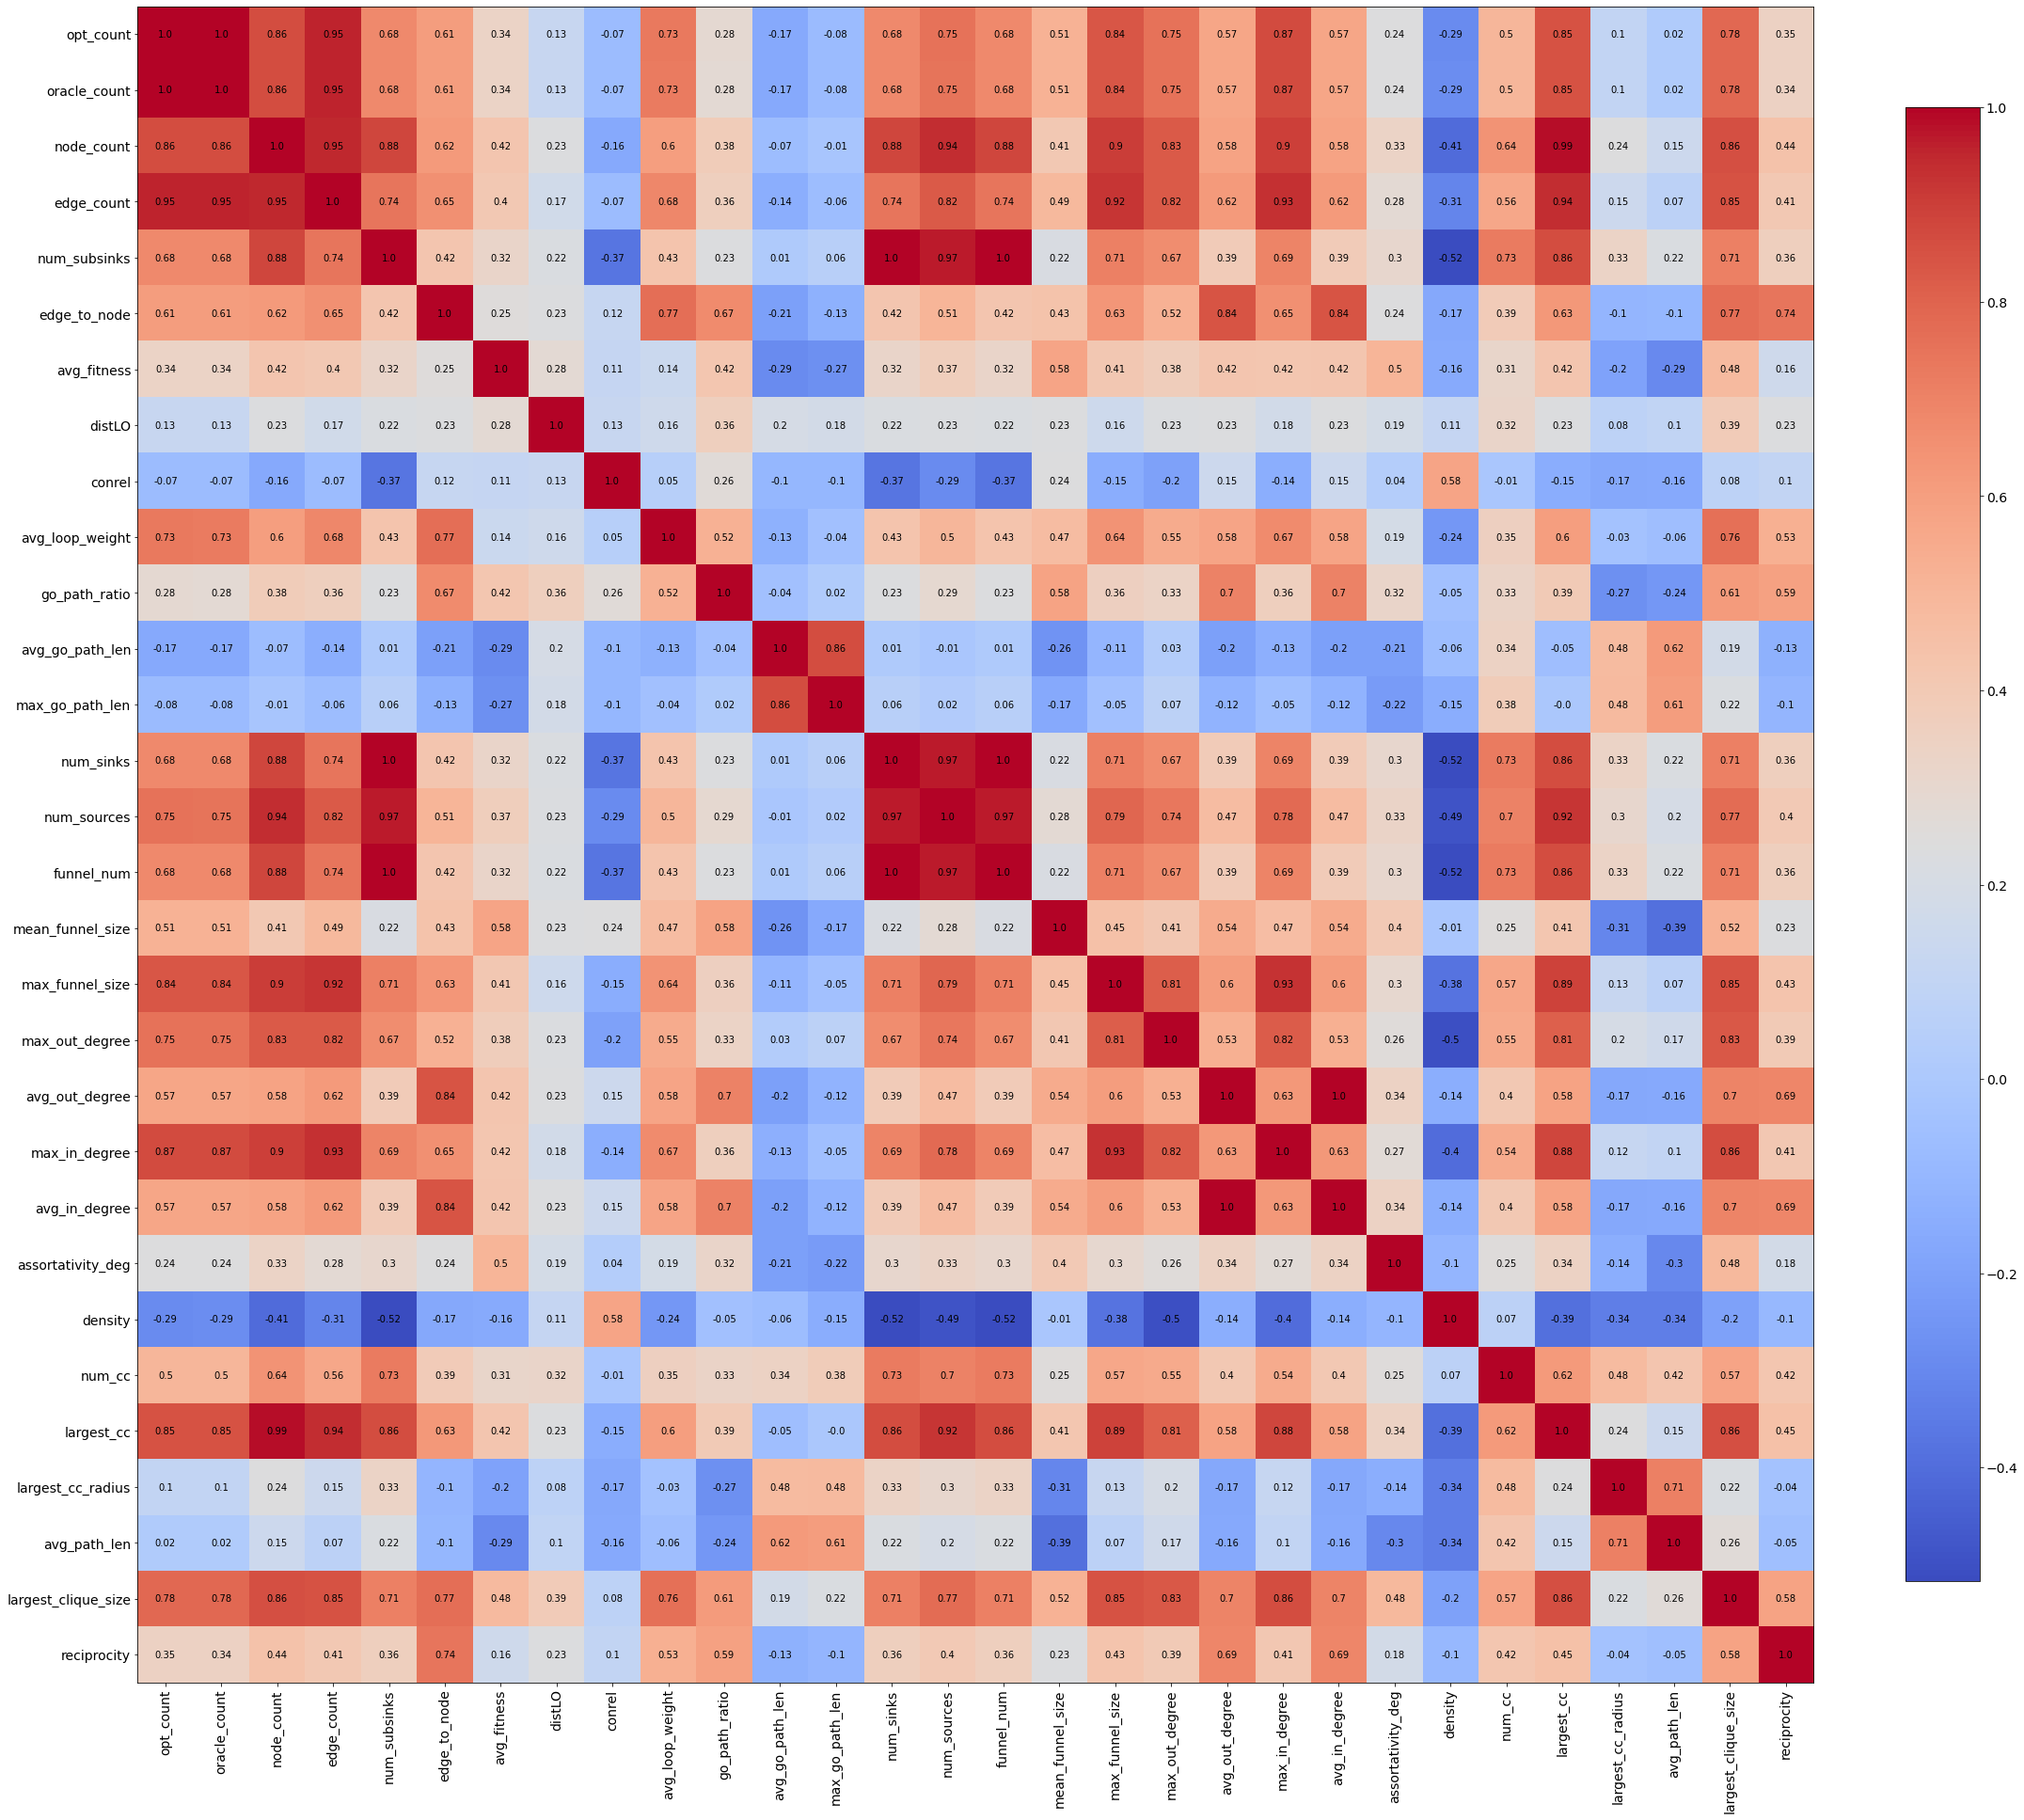

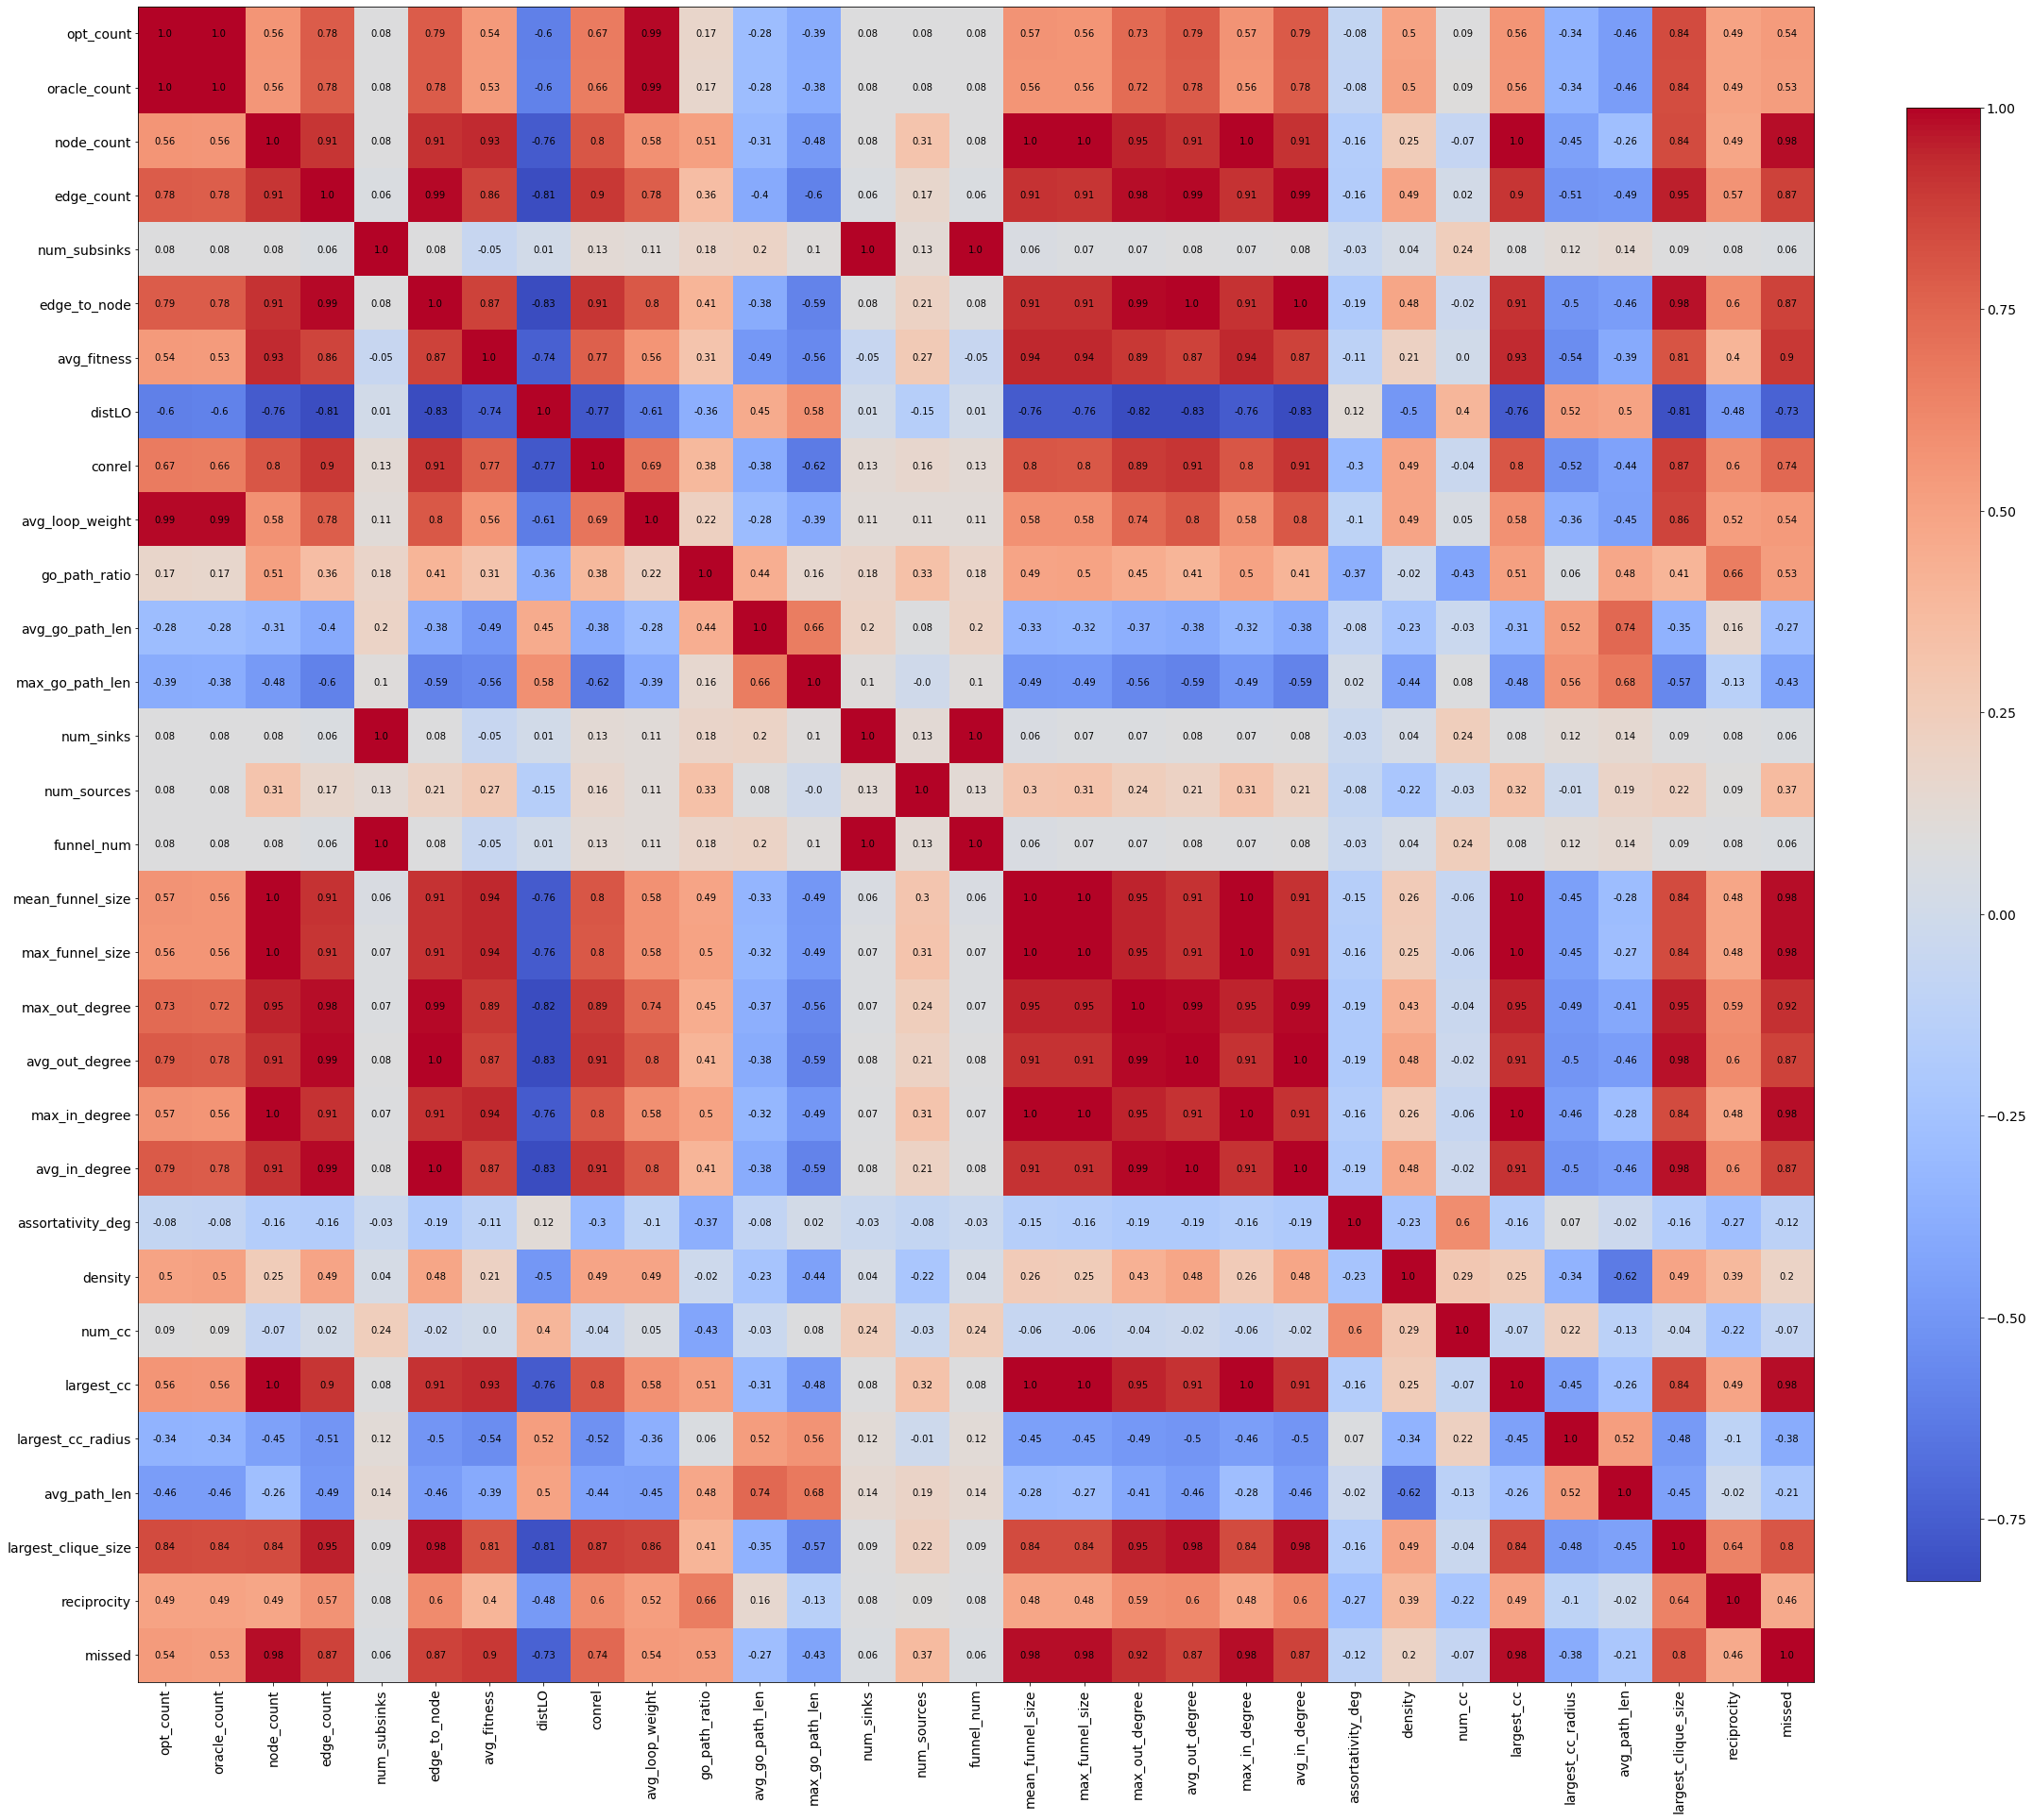

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def draw_corr_matrix(df):
    f = plt.figure(figsize=(30, 30))
    im = plt.imshow(df, cmap="coolwarm")
    plt.xticks(range(df.select_dtypes(['number']).shape[1]),
               df.select_dtypes(['number']).columns,
               fontsize=14,
               rotation=90)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]),
               df.select_dtypes(['number']).columns,
               fontsize=14)

    cb = plt.colorbar(fraction=0.04)
    cb.ax.tick_params(labelsize=14)
    # plt.title('Macierz korelacji poszczególnych miar', fontsize=24)

    for i in range(len(df.index)):
        for j in range(len(df.columns)):
            text = plt.text(j,
                            i,
                            round(df.iloc[j, i], 2),
                            ha="center",
                            va="center",
                            color="black")

    f.tight_layout()


def make_mean_corr_plot(files):
    dfs = {}
    mean_df = pd.DataFrame()

    for f in files:
        dfs[f] = pd.read_csv(f, sep=";", index_col=0)

    metrics = list(dfs[files[0]].columns.values)
    metrics.remove("time_ms")
    if('cliques_num' in metrics):
        metrics.remove("cliques_num")
    if('maximal_cliques_num' in metrics):
        metrics.remove("maximal_cliques_num")

    for key in dfs:
        dfs[key] = dfs[key].loc[metrics, metrics]
        dfs[key] = dfs[key].fillna(1)

    for row in metrics:
        for column in metrics:
            sum = 0
            for key in dfs:
                sum += dfs[key].loc[row, column]
            
            sum /= len(dfs)
            mean_df.loc[row, column] = sum

    draw_corr_matrix(mean_df)
    


files_small_twophase = [
    "../stat_results/twophase/per1/cliques_20_twophase_stats_corr.csv",
    "../stat_results/twophase/per1/uniform_20_twophase_stats_corr.csv",
    "../stat_results/twophase/per1/grid_20_twophase_stats_corr.csv",
    "../stat_results/twophase/per1/conv_burma14_twophase_stats_corr.csv",
    "../stat_results/twophase/per1/conv_ulysses22_twophase_stats_corr.csv",
]

files_twophase = []

files_small_snowball = [
    "../stat_results/snowball/per1/cliques_20_snowball_stats_corr.csv",
    "../stat_results/snowball/per1/uniform_20_snowball_stats_corr.csv",
    "../stat_results/snowball/per1/grid_20_snowball_stats_corr.csv",
    "../stat_results/snowball/per1/conv_burma14_snowball_stats_corr.csv",
    "../stat_results/snowball/per1/conv_ulysses22_snowball_stats_corr.csv",
]

files_snowball = [
    "../stat_results/snowball/per100/cliques_50_snowball_stats_corr.csv",
    "../stat_results/snowball/conv_bier127_snowball_stats_corr.csv",
    "../stat_results/snowball/cliques_80_snowball_stats_corr.csv",
    "../stat_results/snowball/cliques_100_snowball_stats_corr.csv",

    "../stat_results/snowball/uniform_50_snowball_stats_corr.csv",
    "../stat_results/snowball/uniform_80_snowball_stats_corr.csv",
    "../stat_results/snowball/uniform_100_snowball_stats_corr.csv",

    "../stat_results/snowball/grid_50_snowball_stats_corr.csv",
    "../stat_results/snowball/grid_80_snowball_stats_corr.csv",
    "../stat_results/snowball/grid_100_snowball_stats_corr.csv",

    "../stat_results/snowball/conv_att48_snowball_stats_corr.csv",
    "../stat_results/snowball/conv_berlin52_snowball_stats_corr.csv",
    "../stat_results/snowball/conv_pr76_snowball_stats_corr.csv",
    "../stat_results/snowball/conv_eil76_snowball_stats_corr.csv",
    "../stat_results/snowball/conv_rat99_snowball_stats_corr.csv",
]

sn_all = files_small_snowball + files_snowball
tp_all = files_small_twophase + files_twophase

make_mean_corr_plot(sn_all)
make_mean_corr_plot(tp_all)
# make_mean_corr_plot(files_small_snowball)
# make_mean_corr_plot(files_small_twophase)

